In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Primary image

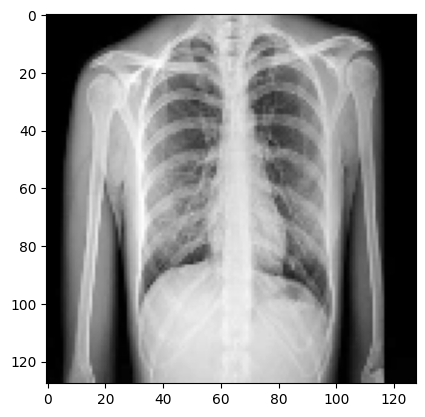

In [20]:
I = cv2.imread('download.jfif')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = cv2.resize(I, (128, 128))

plt.imshow(I, cmap = 'gray')

C:\Users\Fateme\AppData\Local\Temp\ipykernel_19812\2233040787.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  f_mag_10 =np.uint(np.abs(fft_img) / np.mean(fft_img) * 255)
C:\Users\Fateme\AppData\Local\Temp\ipykernel_19812\2233040787.py:4: RuntimeWarning: invalid value encountered in cast
  f_mag_10 =np.uint(np.abs(fft_img) / np.mean(fft_img) * 255)


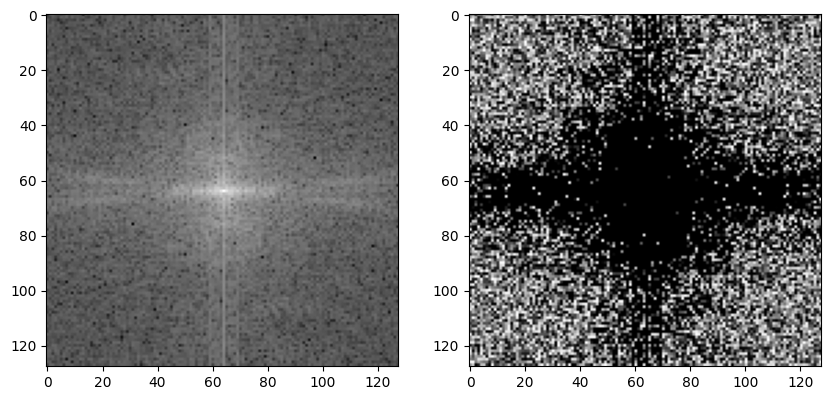

In [119]:
fft_img = np.fft.fft2(I)
fft_img = np.fft.fftshift(fft_img)
f_mag = np.log(np.abs(fft_img) )
f_mag_10 =np.uint(np.abs(fft_img) / np.mean(fft_img) * 255)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(f_mag, cmap='gray')
axes[1].imshow(f_mag_10, cmap='gray')

# Create image detail pyramid

In [51]:
def image_pyramid(I, n_levels):
    detail_list = []
    I = np.float32(I)
    
    for l in range(n_levels):
        I_d = cv2.pyrDown(I)
        D = I - cv2.pyrUp(I_d)
        detail_list.append(D)
        I = I_d
        
    detail_list.append(I)
    return detail_list

In [60]:
prm = image_pyramid(I, 3)
for i in range(4):
    print(prm[i].shape)

(128, 128)
(64, 64)
(32, 32)
(16, 16)


Text(0.5, 1.0, 'Original image')

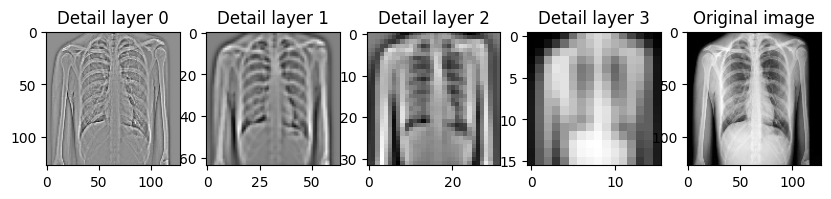

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(4):
    axes[i].imshow(prm[i], cmap='gray')
    axes[i].set_title('Detail layer '+ str(i))
axes[4].imshow(I, cmap='gray')
axes[4].set_title('Original image')

# Pyramid reconstruction

In [69]:
def image_pyrm_rec(detail_pyrm, n_level):
    mask = detail_pyrm[-1]
    for i in range(1, n_level+1):
        mask = cv2.pyrUp(mask) + detail_pyrm[-(i+1)]
    return mask

Text(0.5, 1.0, 'Original image')

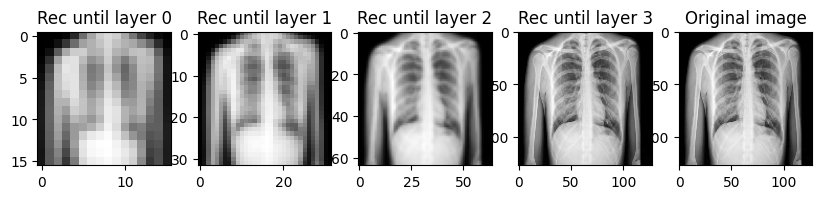

In [76]:
reconstructed_image = image_pyrm_rec(prm, 3)

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(4):
    axes[i].imshow(image_pyrm_rec(prm, i), cmap='gray')
    axes[i].set_title('Rec until layer '+ str(i))

axes[4].imshow(I, cmap='gray')
axes[4].set_title('Original image')

# Unsharp Masking

Text(0.5, 1.0, 'sharpen edges')

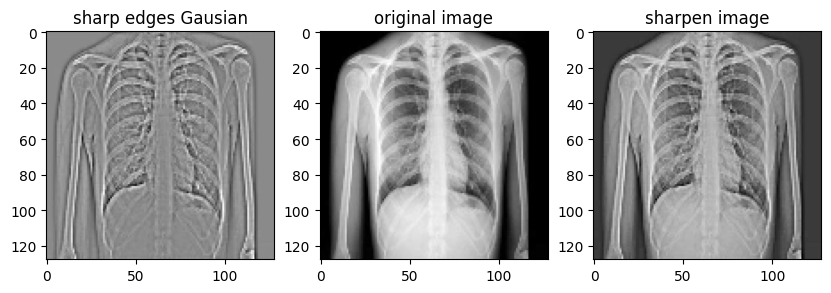

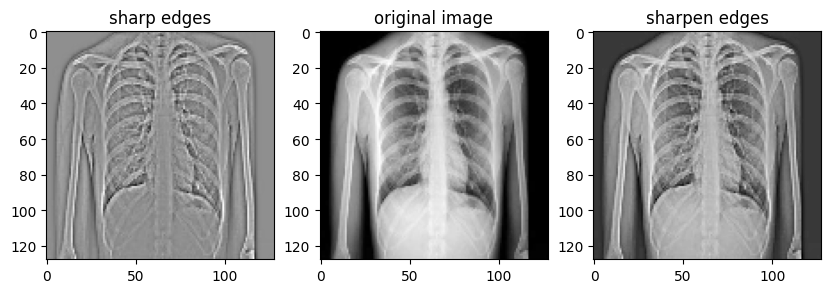

In [116]:
I = np.float32(I)
sharp_edge = I - cv2.pyrUp(cv2.pyrDown(I))
sharp_edge_GausianBlur = I - cv2.GaussianBlur(I, (5,5), 3)

fig, axes = plt.subplots(1, 3, figsize=(10,15))
axes[0].imshow(sharp_edge_GausianBlur, cmap = 'gray')
axes[0].set_title('sharp edges Gausian')
axes[1].imshow(I, cmap = 'gray')
axes[1].set_title('original image')
axes[2].imshow(I + 2 * sharp_edge_GausianBlur, cmap = 'gray')
axes[2].set_title('sharpen image')

fig, axes = plt.subplots(1, 3, figsize=(10,15))
axes[0].imshow(sharp_edge, cmap = 'gray')
axes[0].set_title('sharp edges')
axes[1].imshow(I, cmap = 'gray')
axes[1].set_title('original image')
axes[2].imshow(I + 2 * sharp_edge, cmap = 'gray')
axes[2].set_title('sharpen edges')

# Global enhancement

In [111]:
def global_enhancement(I, slope):
   return (np.tanh(I * slope) * max(np.max(I),np.abs(np.min(I))))

Text(0.5, 1.0, 'Original image')

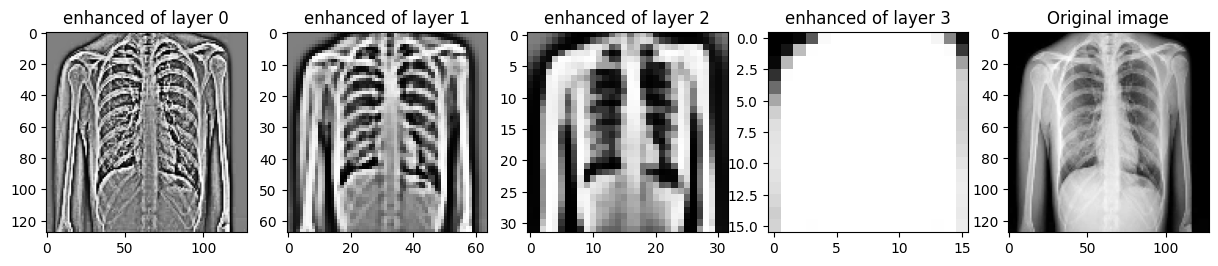

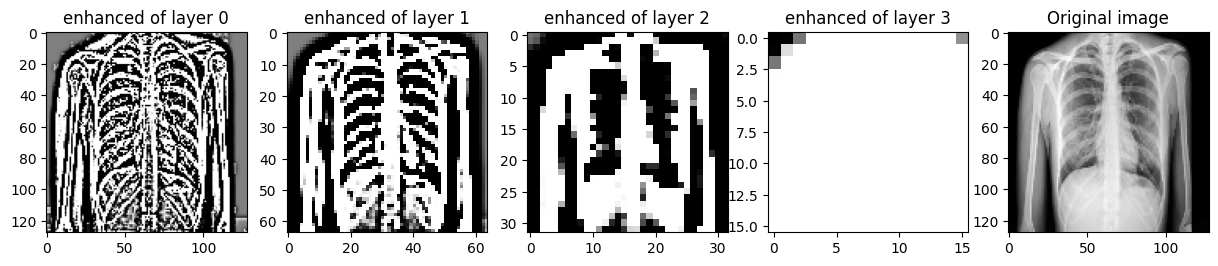

In [117]:
prm_enhanced = list()
for i in range(4):
    prm_enhanced.append(global_enhancement(prm[i], slope=1/16))
    
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(4):
    axes[i].imshow(prm_enhanced[i], cmap='gray')
    axes[i].set_title('enhanced of layer '+ str(i))

axes[4].imshow(I, cmap='gray')
axes[4].set_title('Original image')

prm_enhanced2 = list()
for i in range(4):
    prm_enhanced2.append(global_enhancement(prm[i], slope=1))
    
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(4):
    axes[i].imshow(prm_enhanced2[i], cmap='gray')
    axes[i].set_title('enhanced of layer '+ str(i))

axes[4].imshow(I, cmap='gray')
axes[4].set_title('Original image')

Text(0.5, 1.0, 'after unsharp masking')

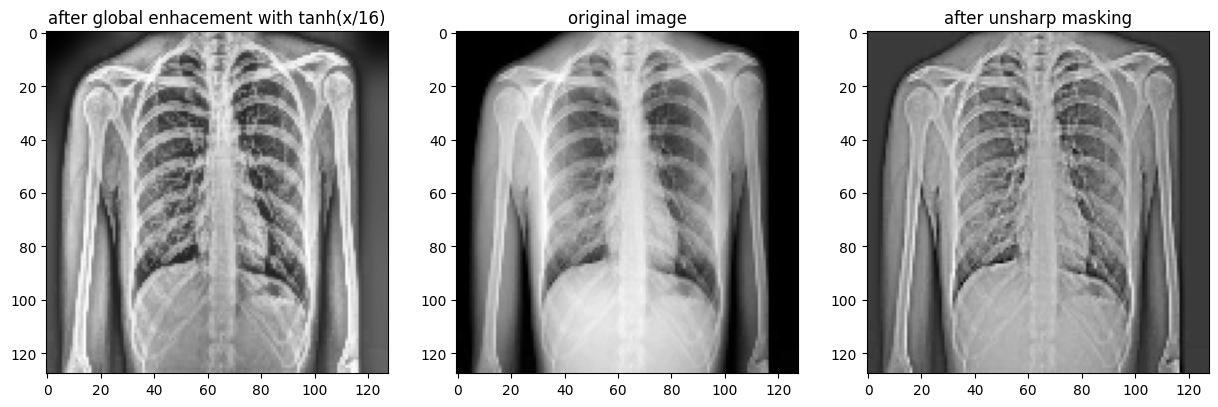

In [120]:
I_e = image_pyrm_rec(prm_enhanced, 3)

fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].imshow(I_e, cmap='gray')
axes[0].set_title('after global enhacement with tanh(x/16)')

axes[1].imshow(I, cmap='gray')
axes[1].set_title('original image')

axes[2].imshow(I + 2 * sharp_edge_GausianBlur, cmap='gray')
axes[2].set_title('after unsharp masking')

Text(0.5, 1.0, 'after unsharp masking')

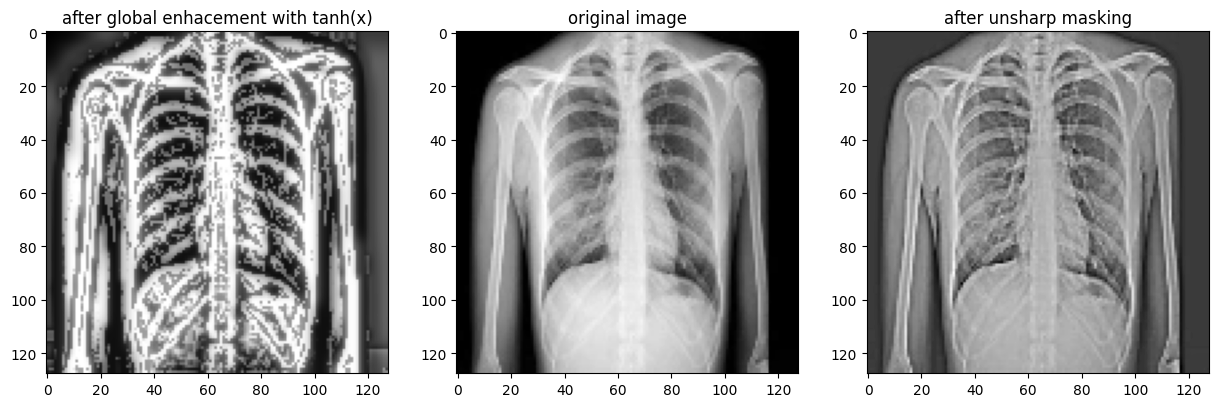

In [121]:
I_e = image_pyrm_rec(prm_enhanced2, 3)

fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].imshow(I_e, cmap='gray')
axes[0].set_title('after global enhacement with tanh(x)')

axes[1].imshow(I, cmap='gray')
axes[1].set_title('original image')

axes[2].imshow(I + 2 * sharp_edge_GausianBlur, cmap='gray')
axes[2].set_title('after unsharp masking')